In [46]:
import pandas as pd
import nltk

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels
%matplotlib inline

In [48]:
mesh = pd.read_csv('mesh_thesaurus.txt', sep='|')
terms = mesh['MESH_TERM']

In [49]:
conditions = pd.read_csv('conditions.txt', sep='|')
conditions.head()

,CONDITION_ID,NCT_ID,CONDITION
0,150,NCT00000262,Substance-Related Disorders
1,151,NCT00000263,Opioid-Related Disorders
2,152,NCT00000263,Substance-Related Disorders
3,153,NCT00000264,Opioid-Related Disorders
4,154,NCT00000264,Substance-Related Disorders


In [50]:
conditions['len(condition)'] = [len(x) for x in conditions['CONDITION']]

In [51]:
categories = conditions[conditions['len(condition)'] < 50]

In [52]:
categories['split descript'] = [len(x.split()) for x in categories['CONDITION']]
categories.head()

/Users/szeitlin/anaconda/envs/clinicaltrials/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,CONDITION_ID,NCT_ID,CONDITION,len(condition),split descript
0,150,NCT00000262,Substance-Related Disorders,27,2
1,151,NCT00000263,Opioid-Related Disorders,24,2
2,152,NCT00000263,Substance-Related Disorders,27,2
3,153,NCT00000264,Opioid-Related Disorders,24,2
4,154,NCT00000264,Substance-Related Disorders,27,2


In [53]:
def word_counter(colname):
    """ Helper for aggregating names"""
    word_count = dict()
    for row in colname:
        for x in row.split():
            if x in word_count:
                word_count[x] += 1
            elif x not in word_count:
                word_count[x] = 1
    return word_count

In [54]:
def create_plottable_df(source_df, colname, skipwords):
    """
    Reusable method for EDA.
    :param: colname (str)
    :param: skipwords (list of str)
    :return: dataframe
    """
    word_count = word_counter(source_df[colname])
    wc_list = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)
    df = pd.DataFrame(wc_list, columns=[colname, 'count'])
    df['drop_these'] = [True if x in skipwords else False for x in df[colname]]
    cleaned = df[df['drop_these']==False]
    cleaned.reset_index(drop=True)
    return cleaned

In [55]:
word_count = word_counter(conditions['CONDITION'])

In [56]:
import operator
condition_wc_list = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)

In [57]:
wc_s = pd.Series(word_count)
wc_s.mean()

33.377763912178764

In [58]:
wc_s.std()

357.3633493169491

In [59]:
top_1000 = pd.DataFrame(condition_wc_list[0:1000], columns=['condition', 'count'])

In [60]:
top_1000.head()

,condition,count
0,Cancer,31800
1,Disease,16994
2,Stage,11275
3,Cell,10882
4,of,9919


In [61]:
skipwords = ['Disease', 'Diseases', 'Stage', 'Cell', 'Of', 'of', 'in', 
             'and', 'Type', 'Acute', 'Healthy', 'Disorder', 'Disorders', 'Near', 'Time',
            '&', 'Multiple', 'with', '2', 'the', 'With', 'IV', 'III', '1']


In [62]:
top_1000['drop_these'] = [True if x in skipwords else False for x in top_1000['condition'] ]

In [63]:
top_1000.head()

,condition,count,drop_these
0,Cancer,31800,False
1,Disease,16994,True
2,Stage,11275,True
3,Cell,10882,True
4,of,9919,True


In [64]:
top_cleaned = top_1000[top_1000['drop_these']==False]
top_cleaned.reset_index(drop=True).head()

,condition,count,drop_these
0,Cancer,31800,False
1,Lymphoma,9679,False
2,Chronic,9521,False
3,Diabetes,9429,False
4,Breast,8071,False


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

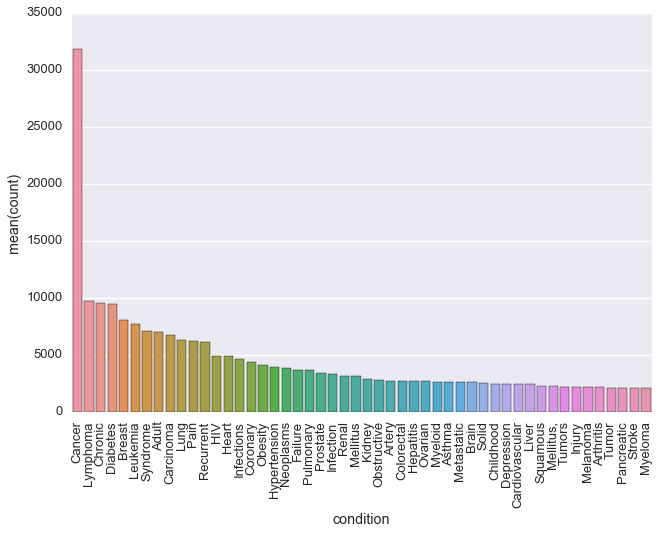

In [65]:
sns.set_context("talk")
sns.barplot(top_cleaned['condition'][0:50], top_cleaned['count'][0:50])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [66]:
# would like to compare numbers of trials vs. population incidence of cancer vs. depression, Arthritis, Stroke, 
# asthma, Hypertension, childhood vs. adult cancers

In [67]:
#http://www.cdc.gov/nchs/fastats/cancer.htm 8.5% of adults who have ever been diagnosed with cancer

In [68]:
top_cleaned[top_cleaned['condition']=='Cancer']

,condition,count,drop_these
0,Cancer,31800,False


In [69]:
31800/340351

0.0934329559777994

In [70]:
#heart disease is actually the leading cause of death (cancer is #2), but not by much http://www.cdc.gov/nchs/fastats/deaths.htm
top_cleaned[top_cleaned['condition']=='Heart']

,condition,count,drop_these
23,Heart,4886,False


In [71]:
4886/340351

0.014355768015959993

In [116]:
#stroke is #4-5 top killer http://www.cdc.gov/nchs/fastats/stroke.htm 2.6%
top_cleaned[top_cleaned['condition']=='Stroke']

,condition,count,drop_these
67,Stroke,2080,False


In [117]:
2080/340351

0.0061113380010636075

In [72]:
#diabetes http://www.cdc.gov/diabetes/statistics/prev/national/figageadult.htm
top_cleaned[top_cleaned['condition']=='Diabetes']

,condition,count,drop_these
7,Diabetes,9429,False


In [105]:
9429/340351

0.02770375289039844

In [106]:
#alzheimer's ~5.4M, total US population: 323,952,889

In [107]:
5400000/323952889

0.016669090424441313

In [108]:
top_cleaned[top_cleaned['condition']=="Alzheimer's"]

,condition,count,drop_these
157,Alzheimer's,899,False


In [110]:
889/340351

0.002612009366800744

In [111]:
#kidney failure ~ 600k
600000/323952889

0.0018521211582712572

In [114]:
top_cleaned[top_cleaned['condition']=='Renal']

,condition,count,drop_these
38,Renal,3167,False


In [115]:
3167/340351

0.009305099735273291

In [73]:
#asthma prevalence is low, e.g. average these: http://www.cdc.gov/asthma/asthmadata.htm

In [74]:
age_pct = (8.6 + 7.4)/2 #lazy way to do this
age_pct

8.0

In [75]:
sex_pct = (6.3 + 9)/2
sex_pct

7.65

In [76]:
race_pct = (7.6 + 9.9 + 6.7)/3
race_pct

8.066666666666666

In [77]:
#% of total trials that have asthma listed in the conditions:
conditions.shape

(340351, 4)

In [78]:
top_cleaned[top_cleaned['condition']=='Asthma']

,condition,count,drop_these
48,Asthma,2590,False


In [79]:
freq = 2590/340351
freq

0.007609791068632089

In [80]:
#arthritis: http://www.cdc.gov/arthritis/data_statistics/index.htm 22.7% of adults
top_cleaned[top_cleaned['condition']=='Arthritis']

,condition,count,drop_these
62,Arthritis,2132,False


In [81]:
freq = 2132/340351
freq

0.006264121451090198

In [82]:
#depression: http://www.cdc.gov/nchs/fastats/depression.htm morbidity 7.6% of 12 years or older
top_cleaned[top_cleaned['condition']=='Depression']

,condition,count,drop_these
53,Depression,2452,False


In [83]:
freq = 2452/340351
freq

0.0072043272974076766

In [84]:
#hypertension: http://www.cdc.gov/nchs/fastats/hypertension.htm 33.5%
top_cleaned[top_cleaned['condition']=='Hypertension']

,condition,count,drop_these
29,Hypertension,3932,False


In [85]:
freq = 3932/34051
freq

0.11547384805145224

In [86]:
#obesity: http://www.cdc.gov/nchs/fastats/obesity-overweight.htm 37.9%
top_cleaned[top_cleaned['condition']=='Obesity']

,condition,count,drop_these
28,Obesity,4126,False


In [87]:
freq = 4126/34051
freq

0.12117118439987078

In [88]:
designs = pd.read_csv('designs.txt', sep='|')
designs.head()

,DESIGN_ID,NCT_ID,DESIGN_NAME,DESIGN_VALUE,MASKED_ROLE
0,234,NCT00000194,Masking,Double-Blind,NaN
1,235,NCT00000194,Primary Purpose,Treatment,NaN
2,236,NCT00000195,Intervention Model,Crossover Assignment,NaN
3,237,NCT00000195,Masking,Double-Blind,NaN
4,238,NCT00000195,Primary Purpose,Treatment,NaN


In [89]:
designs

,DESIGN_ID,NCT_ID,DESIGN_NAME,DESIGN_VALUE,MASKED_ROLE
0,234,NCT00000194,Masking,Double-Blind,NaN
1,235,NCT00000194,Primary Purpose,Treatment,NaN
2,236,NCT00000195,Intervention Model,Crossover Assignment,NaN
3,237,NCT00000195,Masking,Double-Blind,NaN
4,238,NCT00000195,Primary Purpose,Treatment,NaN
5,239,NCT00000196,Masking,Double-Blind,NaN
6,240,NCT00000196,Primary Purpose,Treatment,NaN
7,241,NCT00000197,Primary Purpose,Treatment,NaN
8,242,NCT00000198,Primary Purpose,Treatment,NaN
9,243,NCT00000199,Primary Purpose,Treatment,NaN


In [90]:
events = pd.read_csv('reported_event_ctgy.txt', sep='|')
events.head()

/Users/szeitlin/anaconda/envs/clinicaltrials/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,REPORTED_EVENT_CATEGORY_ID,REPORTED_EVENT_ID,CATEGORY_TITLE,CATEGORY_SUB_TITLE,CATEGORY_DESCRIPTION,CATEGORY_ASSESSMENT
0,110,7,Blood and lymphatic system disorders,Amylase,NaN,NaN
1,111,7,Blood and lymphatic system disorders,"Blood,Bone marrow,other",NaN,NaN
2,112,7,Blood and lymphatic system disorders,Fibrinogen,NaN,NaN
3,113,7,Blood and lymphatic system disorders,Hematuria,NaN,NaN
4,114,211,Immune system disorders,Thrombocytopenia,NaN,NaN


In [91]:
counted_events = events.groupby('CATEGORY_TITLE').count().reset_index()

In [92]:
counted_events.head()

,CATEGORY_TITLE,REPORTED_EVENT_CATEGORY_ID,REPORTED_EVENT_ID,CATEGORY_SUB_TITLE,CATEGORY_DESCRIPTION,CATEGORY_ASSESSMENT
0,Blood and lymphatic system disorders,27073,27073,27073,607,170
1,Cardiac disorders,42023,42023,42023,981,149
2,"Congenital, familial and genetic disorders",2084,2084,2084,101,6
3,Ear and labyrinth disorders,6113,6113,6113,80,24
4,Endocrine disorders,3562,3562,3562,125,27


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

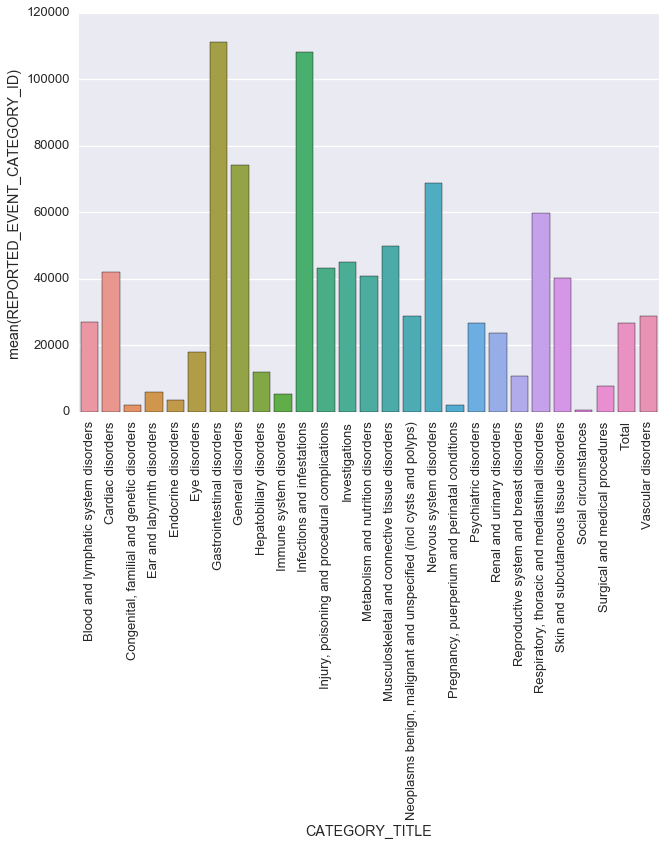

In [93]:
sns.barplot(counted_events['CATEGORY_TITLE'], counted_events['REPORTED_EVENT_CATEGORY_ID'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [94]:
milestones = pd.read_csv('results_partflow_mlstn.txt', sep='|')
milestones.head()

,MILESTONE_ID,PARTICIPANT_FLOW_ID,MILESTONE_TYPE,MILESTONE_TITLE
0,41,81,Milestone,STARTED
1,42,81,Milestone,COMPLETED
2,43,81,Milestone,NOT COMPLETED
3,44,82,Milestone,STARTED
4,45,82,Milestone,COMPLETED


In [95]:
milestone_count = word_counter(milestones['MILESTONE_TITLE'])

In [96]:
mesh_true = pd.Series([True if x in terms else False for x in sorted(milestone_count)])

In [97]:
'Adverse' in terms

False

In [98]:
sorted(milestone_count.items(), key=operator.itemgetter(1), reverse=True)

[('COMPLETED', 52282),
 ('NOT', 26143),
 ('STARTED', 26140),
 ('Subject', 9786),
 ('by', 9699),
 ('Withdrawal', 9564),
 ('to', 9368),
 ('Adverse', 8606),
 ('Event', 8554),
 ('Follow-up', 7414),
 ('Lost', 7311),
 ('Protocol', 4807),
 ('of', 4792),
 ('Violation', 4298),
 ('Lack', 3226),
 ('Death', 3224),
 ('Efficacy', 3116),
 ('Decision', 2924),
 ('Physician', 2543),
 ('not', 1672),
 ('Not', 1512),
 ('Study', 1417),
 ('Other', 1085),
 ('Received', 996),
 ('study', 954),
 ('Disease', 904),
 ('Treatment', 899),
 ('Treated', 778),
 ('Unspecified', 703),
 ('criteria', 645),
 ('Did', 603),
 ('Sponsor', 583),
 ('Administrative', 570),
 ('specified', 558),
 ('Criteria', 550),
 ('Drug', 542),
 ('treatment', 538),
 ('Pregnancy', 523),
 ('at', 519),
 ('Completed', 511),
 ('Progression', 474),
 ('No', 454),
 ('with', 453),
 ('Patient', 440),
 ('drug', 437),
 ('in', 433),
 ('Population', 421),
 ('for', 418),
 ('Dose', 406),
 ('progression', 406),
 ('or', 397),
 ('Non-compliance', 392),
 ('Consent', 

In [99]:
words_of_interest = ['COMPLETED', 'Completed', 'completed',
                     'STARTED', 
                     'Adverse', 'adverse', 
                     'Relapse', 'relapse', 'Progression/relapse', 'worsening', 'Recurrent'
                     'Pain', 'Discomfort',
                     'Death', 'death', 'Toxicity','toxicity',
                     'Withdrawal', 'withdrawal', 'withdrew', 'Withdrawn', 'withdrawn',
                     'Discontinuation', 'discontinued',
                     'Exclusion', 'exclusion',
                     'Randomized','randomization', 'Randomised',
                     'Incarcerated', 'incarcerated',
                     'Treated', 'treated', 'TREATED',
                    'Noncompliance', 'non-compliance', 'Non-Compliance', 'non-compliant', 'Non-Compliant',
                     'Poor/non-compliance', 'Poor/Non-Compliance', 'poor/non-compliance',
                     'Ineligible', 'ineligible',
                     'Failure', 'failure', 'Failed', 'failed', 'failures',
                     'Response', 'response', 
                     'Terminated', 'terminated', 'Termination', 'termination', 'Closed/Terminated',
                     'Ongoing', 
                    'Refused', 'Discontinued', 'Declined']

In [100]:
clinical_studies = pd.read_csv('clinical_study_noclob.txt', sep='|', error_bad_lines = False)
clinical_studies.head()

b'Skipping line 33151: expected 42 fields, saw 43\n'
b'Skipping line 59729: expected 42 fields, saw 43\n'
b'Skipping line 137282: expected 42 fields, saw 43\n'
b'Skipping line 210235: expected 42 fields, saw 43\n'
b'Skipping line 254292: expected 42 fields, saw 67\n'
/Users/szeitlin/anaconda/envs/clinicaltrials/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NCT_ID,DOWNLOAD_DATE,DOWNLOAD_DATE_DT,ORG_STUDY_ID,BRIEF_TITLE,OFFICIAL_TITLE,ACRONYM,SOURCE,HAS_DMC,OVERALL_STATUS,...,FIRSTRECEIVED_DATE,IS_SECTION_801,IS_FDA_REGULATED,WHY_STOPPED,HAS_EXPANDED_ACCESS,FIRSTRECEIVED_RESULTS_DATE,URL,TARGET_DURATION,STUDY_RANK,LIMITATIONS_AND_CAVEATS
0,NCT00000105,ClinicalTrials.gov processed this data on Marc...,03/24/2016,2002LS032,Vaccination With Tetanus and KLH to Assess Imm...,Vaccination With Tetanus Toxoid and Keyhole Li...,NaN,"Masonic Cancer Center, University of Minnesota",Yes,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"- Patients with Cancer (breast, mel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,- Transplant patients (umbilical co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,- Patients receiving other cancer v...,November 2012,"November 6, 2012","November 3, 1999",Yes,Yes,Replaced by another study.,No,NaN,https://clinicaltrials.gov/show/NCT00000105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCT00000106,ClinicalTrials.gov processed this data on Marc...,03/24/2016,NCRR-M01RR03186-9943,41.8 Degree Centigrade Whole Body Hyperthermia...,NaN,NaN,National Center for Research Resources (NCRR),NaN,"Active, not recruiting",...,"January 18, 2000",NaN,NaN,NaN,No,NaN,https://clinicaltrials.gov/show/NCT00000106,NaN,211434.0,NaN


In [101]:
clinical_studies.columns

Index(['NCT_ID', 'DOWNLOAD_DATE', 'DOWNLOAD_DATE_DT', 'ORG_STUDY_ID',
       'BRIEF_TITLE', 'OFFICIAL_TITLE', 'ACRONYM', 'SOURCE', 'HAS_DMC',
       'OVERALL_STATUS', 'START_DATE', 'COMPLETION_DATE',
       'COMPLETION_DATE_TYPE', 'PRIMARY_COMPLETION_DATE',
       'PRIMARY_COMPLETION_DATE_TYPE', 'PHASE', 'STUDY_TYPE', 'STUDY_DESIGN',
       'NUMBER_OF_ARMS', 'NUMBER_OF_GROUPS', 'ENROLLMENT_TYPE', 'ENROLLMENT',
       'BIOSPEC_RETENTION', 'BIOSPEC_DESCR', 'GENDER', 'MINIMUM_AGE',
       'MAXIMUM_AGE', 'HEALTHY_VOLUNTEERS', 'SAMPLING_METHOD', 'STUDY_POP',
       'VERIFICATION_DATE', 'LASTCHANGED_DATE', 'FIRSTRECEIVED_DATE',
       'IS_SECTION_801', 'IS_FDA_REGULATED', 'WHY_STOPPED',
       'HAS_EXPANDED_ACCESS', 'FIRSTRECEIVED_RESULTS_DATE', 'URL',
       'TARGET_DURATION', 'STUDY_RANK', 'LIMITATIONS_AND_CAVEATS'],
      dtype='object')

In [102]:
baseline = pd.read_csv('results_baseline_measure_catgy.txt', sep='|')
baseline.head()

/Users/szeitlin/anaconda/envs/clinicaltrials/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BASELINE_MEASURE_CATGY_ID,BASELINE_ID,CATEGORY_TITLE,ARM_GROUP_ID,BASELINE_VALUE,SPREAD,LOWER_LIMIT,UPPER_LIMIT
0,116,141,Black,337293,10,NaN,NaN,NaN
1,117,142,United States,337293,215,NaN,NaN,NaN
2,118,143,NaN,337294,9968,NaN,NaN,NaN
3,119,144,<=18 years,337294,0,NaN,NaN,NaN
4,120,144,Between 18 and 65 years,337294,8981,NaN,NaN,NaN


In [103]:
baseline_measure = pd.read_csv('results_baseline_measure.txt', sep='|')
baseline_measure.head()

,BASELINE_ID,RSLTS_BASELINE_ID,BASELINE_MEASURE_TITLE,DESCRIPTION,UNITS_OF_MEASURE,MEASURE_TYPE,DISPERSION
0,91,30,Gender,NaN,participants,Number,NaN
1,92,30,Region of Enrollment,NaN,participants,Number,NaN
2,93,31,Number of Participants,NaN,participants,Number,NaN
3,94,31,Age,NaN,years,Median,Full Range
4,95,31,Gender,NaN,participants,Number,NaN


In [104]:
measured = baseline.merge(baseline_measure, how='left', on='BASELINE_ID')
measured.head()

,BASELINE_MEASURE_CATGY_ID,BASELINE_ID,CATEGORY_TITLE,ARM_GROUP_ID,BASELINE_VALUE,SPREAD,LOWER_LIMIT,UPPER_LIMIT,RSLTS_BASELINE_ID,BASELINE_MEASURE_TITLE,DESCRIPTION,UNITS_OF_MEASURE,MEASURE_TYPE,DISPERSION
0,116,141,Black,337293,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117,142,United States,337293,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118,143,NaN,337294,9968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119,144,<=18 years,337294,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120,144,Between 18 and 65 years,337294,8981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
